In [152]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer


SyntaxError: invalid syntax (<ipython-input-152-bc9abc83caee>, line 2)

In [ ]:
df = pd.read_csv('train.csv')
df_for_train = df.copy()
df.head()

In [ ]:
df.info()

In [153]:
df.isnull().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name       191
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1           166
charges_2 (%)       185
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [154]:
df.dropna(subset=['Stall_no', 'Discount_avail', 'Selling_Price', 'Minimum_price', 'Maximum_price'], inplace=True)

In [155]:
df.isnull().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name       191
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1           166
charges_2 (%)       185
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [156]:
df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,5912.000000,5912.000000,5912.000000,5912.000000,5912.000000,5746.000000,5727.000000,5912.000000,5912.000000,5912.000000
mean,25.222429,197.713464,0.647666,50.877368,0.142422,263.789071,10.151737,3540.592524,6448.589479,4569.460508
std,14.329275,169.792265,1.028858,29.096413,0.349512,123.821353,4.320167,2205.477068,3724.159884,3001.442012
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,124.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.750000,3928.000000,2431.456217
50%,25.000000,126.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3171.000000,5654.000000,4216.580616
75%,37.000000,389.000000,2.000000,76.000000,0.000000,313.000000,14.000000,4715.000000,8142.000000,6179.715481
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


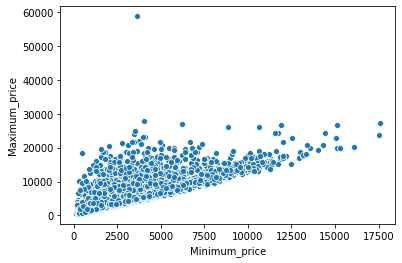

In [157]:
sns.scatterplot(df['Minimum_price'], df['Maximum_price'])

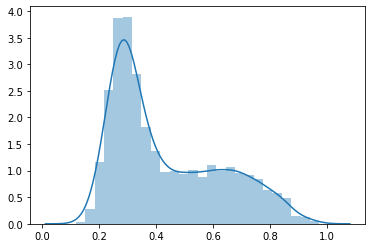

In [158]:
difference_price_percent = (df['Maximum_price']-df['Minimum_price'])/df['Maximum_price']
sns.distplot(difference_price_percent)

In [159]:
 difference_price_percent.median()

0.3585970426108678

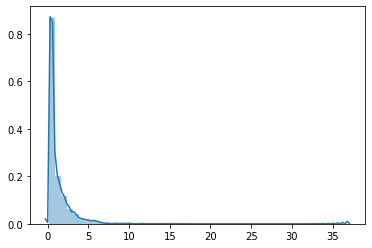

In [160]:
difference_price_percent = (df['Maximum_price']-df['Minimum_price'])/df['Minimum_price']
sns.distplot(difference_price_percent)

In [161]:
difference_price_percent.median()

0.5590823036828979

In [162]:
df_for_train.to_csv('check.csv')

In [163]:
#sns.pairplot(df)

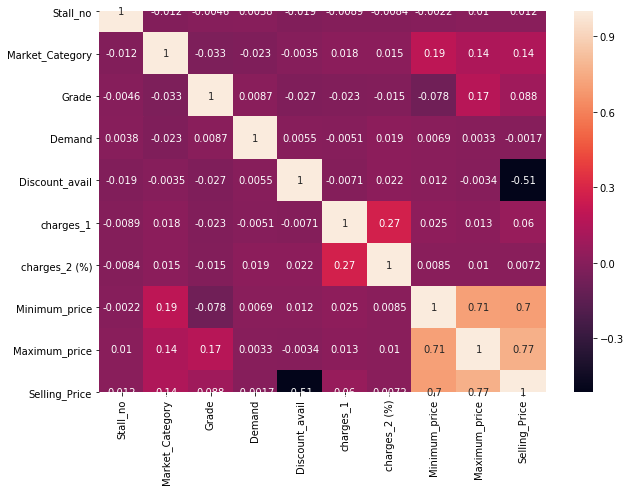

In [164]:
fig, ax = plt.subplots(figsize=[10, 7])
sns.heatmap(df.corr(), annot=True)

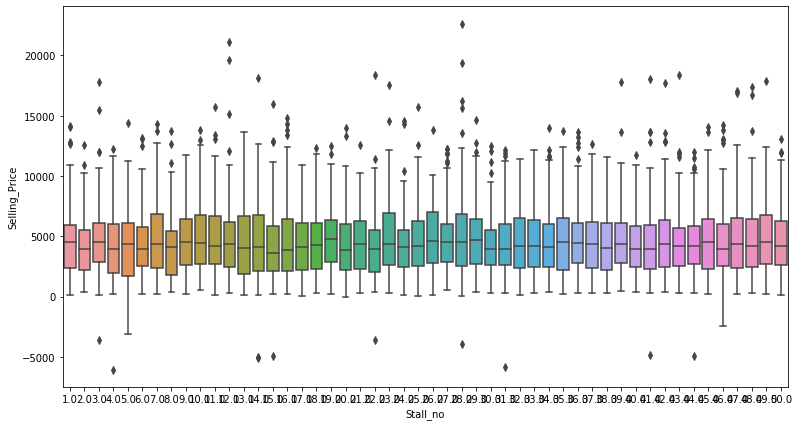

In [165]:
fig, ax = plt.subplots(figsize=[13, 7])
sns.boxplot(x='Stall_no', y='Selling_Price', data=df)

* There is a significant difference between the selling price in months, Years and days.
* So we could extract new columns of month, year and day with this date feature.

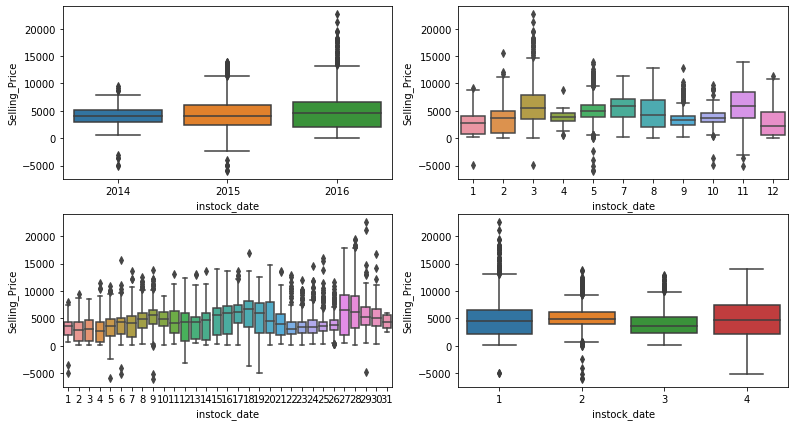

In [166]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=[13, 7])
axes = ax.flatten()
sns.boxplot(x=pd.to_datetime(df['instock_date']).dt.year, y=df['Selling_Price'], ax=axes[0])
sns.boxplot(x=pd.to_datetime(df['instock_date']).dt.month, y=df['Selling_Price'], ax=axes[1])
sns.boxplot(x=pd.to_datetime(df['instock_date']).dt.day, y=df['Selling_Price'], ax=axes[2])
sns.boxplot(x=pd.to_datetime(df['instock_date']).dt.quarter, y=df['Selling_Price'], ax=axes[3])

* Most of the Customer names are unique, so it will not have much impact in the selling price.
* So we could one hot encode the product with customer name and unknown. 

In [167]:
df['Customer_name'].nunique()

5501

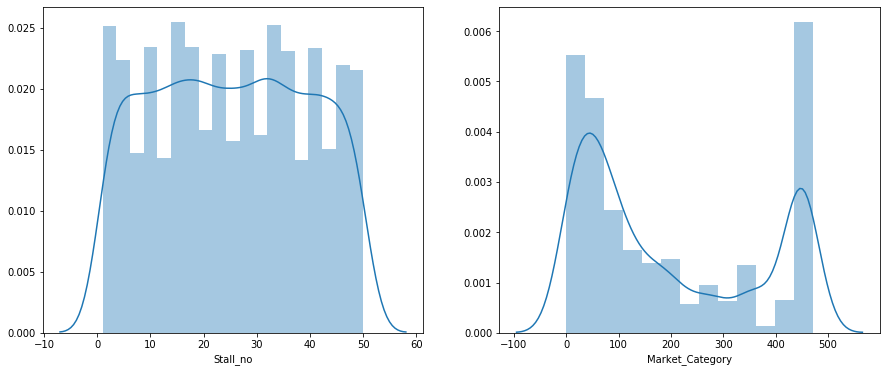

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=[15, 6])
axes = ax.flatten()
sns.distplot(df['Stall_no'], ax=axes[0])
sns.distplot(df['Market_Category'], ax=axes[1])

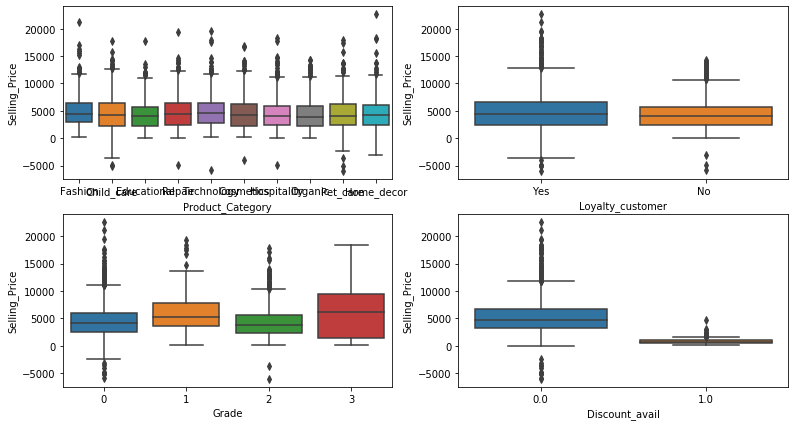

In [169]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=[13, 7])
axes = ax.flatten()
sns.boxplot(x='Product_Category', y='Selling_Price', data=df, ax=axes[0])
sns.boxplot(x='Loyalty_customer', y='Selling_Price', data=df, ax=axes[1])
sns.boxplot(x='Grade', y='Selling_Price', data=df, ax=axes[2])
sns.boxplot(x='Discount_avail', y='Selling_Price', data=df, ax=axes[3])

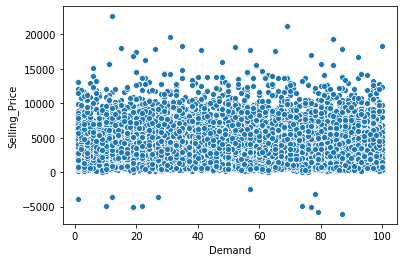

In [170]:
sns.scatterplot(x=df['Demand'], y=df['Selling_Price'])


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1329.,  631., 1272., 1143.,  565.,  260.,   78.,  142.,  164.,
         162.]),
 array([100. , 154.9, 209.8, 264.7, 319.6, 374.5, 429.4, 484.3, 539.2,
        594.1, 649. ]),
 <a list of 10 Patch objects>)

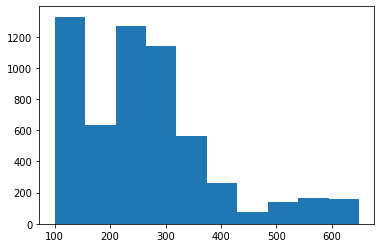

In [171]:
plt.hist(df['charges_1'])

(array([244., 251., 444., 866., 405., 723., 807., 391., 828., 768.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <a list of 10 Patch objects>)

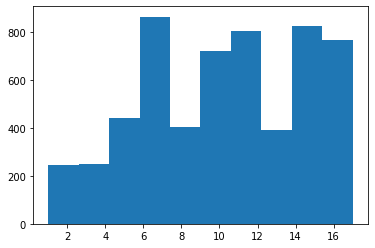

In [172]:
plt.hist(df['charges_2 (%)'])

(array([1466., 1979., 1405.,  640.,  279.,   92.,   32.,   10.,    6.,
           3.]),
 array([  124. ,  1869.6,  3615.2,  5360.8,  7106.4,  8852. , 10597.6,
        12343.2, 14088.8, 15834.4, 17580. ]),
 <a list of 10 Patch objects>)

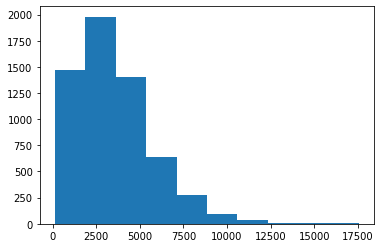

In [173]:
plt.hist(df['Minimum_price'])

(array([3.398e+03, 2.050e+03, 3.900e+02, 6.100e+01, 1.200e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  404. ,  6244.8, 12085.6, 17926.4, 23767.2, 29608. , 35448.8,
        41289.6, 47130.4, 52971.2, 58812. ]),
 <a list of 10 Patch objects>)

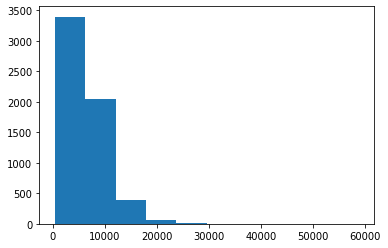

In [174]:
plt.hist(df['Maximum_price'])


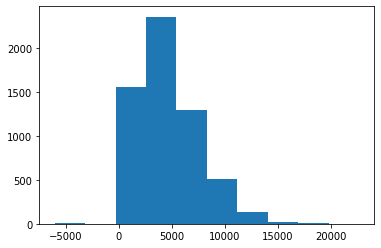

In [175]:
plot = plt.hist(df['Selling_Price'])

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([1.000e+00, 7.000e+00, 2.500e+01, 1.480e+02, 4.520e+02, 4.210e+02,
        1.055e+03, 2.333e+03, 1.332e+03, 1.250e+02]),
 array([ 3.58351894,  4.227907  ,  4.87229507,  5.51668313,  6.1610712 ,
         6.80545926,  7.44984733,  8.09423539,  8.73862346,  9.38301152,
        10.02739959]),
 <a list of 10 Patch objects>)

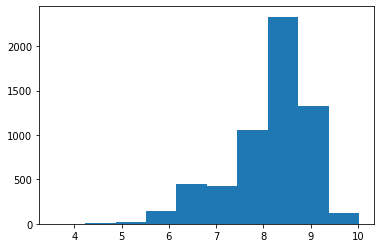

In [176]:
temp = np.array(df['Selling_Price']).reshape(1,-1)
#plt.hist(PowerTransformer().fit_transform(plot))
plt.hist(np.log(df['Selling_Price']))

In [177]:
df_for_train[['Minimum_price','Maximum_price']].dropna(how='all')

,Minimum_price,Maximum_price
0,2983.0,4713.0
1,7495.0,10352.0
2,5752.0,7309.0
3,5090.0,20814.0
4,2430.0,9261.0
...,...,...
6363,8174.0,11266.0
6364,3564.0,4920.0
6365,5303.0,14614.0
6366,4334.0,5849.0


In [178]:
df_for_train.dropna(subset=['Stall_no', 'Discount_avail', 'Selling_Price', 'Minimum_price', 'Maximum_price'], inplace=True)

In [179]:
#maximum = df_for_train['Minimum_price']*(1.55)
#minimum = df_for_train['Maximum_price']*(0.6415) 
#df_for_train['Maximum_price'].fillna(maximum, inplace=True)
#df_for_train['Minimum_price'].fillna(minimum, inplace=True)

In [180]:
df_for_train.isnull().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name       190
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1           165
charges_2 (%)       185
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [181]:
df_for_train.drop(df_for_train[df_for_train['Selling_Price']<=0].index, inplace=True)

In [182]:
class DateExtract(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        Date = pd.to_datetime(df['instock_date'])
        df['year'] = Date.dt.year
        df['month'] = Date.dt.month
        df['day'] = Date.dt.day
        return df[['year', 'month', 'day']]
class PriceFeaturesExtract(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):

        df['Maximum_price_imputed'] = df['Maximum_price']
        df['Minimum_price_imputed'] = df['Minimum_price']
        maximum = df['Minimum_price']*(1.55)
        minimum = df['Maximum_price']*(0.6415) 
        df['Maximum_price_imputed'] = df['Maximum_price'].fillna(maximum)
        df['Minimum_price_imputed'] = df['Minimum_price'].fillna(minimum)
        df['price_difference'] = df['Maximum_price_imputed'] - df['Minimum_price_imputed']
        df['mean_price'] = ( df['Maximum_price_imputed'] + df['Minimum_price_imputed'])/2
        return df[['price_difference', 'mean_price', 'Maximum_price_imputed', 'Minimum_price_imputed']]

In [183]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from copy import deepcopy
scalling_features = ['Stall_no', 'Market_Category', 'Demand']

numeric_imputing_features = ['charges_1', 'charges_2 (%)']
numeric_imputed = ColumnTransformer([('numeric_imputed', SimpleImputer(strategy='median'), numeric_imputing_features)]
                                   )
price_features = ColumnTransformer([
                                    ('PriceFeaturesExtract', PriceFeaturesExtract(), ['Maximum_price', 'Minimum_price'])
                                    ])
numeric_imputed_scaled = make_pipeline(numeric_imputed, MinMaxScaler())
price_imputed_scaled = make_pipeline(price_features, MinMaxScaler())




categorical_features = ['Loyalty_customer',	'Product_Category',	'Grade', 'Discount_avail']
onehot_encoded = ColumnTransformer([
                                    ('onehot_encoded', OneHotEncoder(), categorical_features)
                                    ])

Feature_extract = ColumnTransformer([
                                    ('Age_customer', DateExtract(), ['instock_date', 'Customer_name'])
                                    ])
final_feature = FeatureUnion([
                                ('numeric_imputed_scaled', numeric_imputed_scaled),
                                ('price_imputed_scaled', price_imputed_scaled),
                                ('onehot_encoded', onehot_encoded),
                                ('Feature_extract', Feature_extract)
])
pipelined_model = Pipeline([
                    ('final_feature', final_feature),
                    ('model', Lasso())
])

In [184]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error
x = df_for_train.iloc[:, :-1]
y = df_for_train.iloc[:, -1]
y = np.log(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)


In [185]:
df_for_train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [186]:
models = [LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor()]
performance = pd.DataFrame(columns = ['Algorithm', 'Train R2 Score', 'Test R2 Score', 'CrossVal Mean R2 Score', 'CrossVal Deviation in R2 Score'])
fitted_models = []
for model in models:
  pipelined_model.set_params(model=model)
  pipelined_model.fit(x_train, y_train)
  fitted_models.append(deepcopy(pipelined_model))
  # print(str(model).split('(')[0])
  # print(pipelined_model.score(x_train, y_train))
  # print(pipelined_model.score(x_test, y_test))
  pipelined_model.fit(x_train, y_train)
  cv = cross_val_score(pipelined_model, X=x, y=y, cv =5, scoring='neg_mean_squared_log_error', n_jobs=-1)
  y_train_pred = pipelined_model.predict(x_train)
  y_test_pred = pipelined_model.predict(x_test)
  performance = performance.append({'Algorithm': str(model).split('(')[0],
                      'Train R2 Score': mean_squared_log_error(np.exp(y_train), np.exp(y_train_pred)),
                      'Test R2 Score': mean_squared_log_error(np.exp(y_test), np.exp(y_test_pred)),
                        'CrossVal Mean R2 Score': cv.mean(),
                      'CrossVal Deviation in R2 Score': cv.std()*2},  ignore_index=True 
                     )

In [187]:
performance

,Algorithm,Train R2 Score,Test R2 Score,CrossVal Mean R2 Score,CrossVal Deviation in R2 Score
0,LinearRegression,0.038022,0.051788,-0.000586,0.000358
1,Lasso,0.734986,0.765574,-0.010138,0.000979
2,Ridge,0.038074,0.052251,-0.000592,0.000357
3,KNeighborsRegressor,0.190173,0.317686,-0.004064,0.000478
4,RandomForestRegressor,0.000285,0.014705,-0.000113,0.000312
5,GradientBoostingRegressor,0.000238,0.014552,-0.000128,0.000295
6,XGBRegressor,0.000039,0.014952,-0.000133,0.000303


In [188]:
performance

,Algorithm,Train R2 Score,Test R2 Score,CrossVal Mean R2 Score,CrossVal Deviation in R2 Score
0,LinearRegression,0.038022,0.051788,-0.000586,0.000358
1,Lasso,0.734986,0.765574,-0.010138,0.000979
2,Ridge,0.038074,0.052251,-0.000592,0.000357
3,KNeighborsRegressor,0.190173,0.317686,-0.004064,0.000478
4,RandomForestRegressor,0.000285,0.014705,-0.000113,0.000312
5,GradientBoostingRegressor,0.000238,0.014552,-0.000128,0.000295
6,XGBRegressor,0.000039,0.014952,-0.000133,0.000303


In [189]:
df['Customer_name'].value_counts().sort_values(ascending=False)

Asher        2
Maysen       2
Jax          2
Sol          2
Lane         2
            ..
Briana       1
Baron        1
Hadassah     1
Annamaria    1
Maysa        1
Name: Customer_name, Length: 5501, dtype: int64

In [190]:
rf = RandomForestRegressor(max_features=0.4)
pipelined_model.set_params(model=rf)
pipelined_model.fit(x_train, y_train)
y_train_pred = pipelined_model.predict(x_train)
y_test_pred = pipelined_model.predict(x_test)
print(mean_squared_log_error(np.exp(y_train), np.exp(y_train_pred)))
print(mean_squared_log_error(np.exp(y_test), np.exp(y_test_pred)))

0.00025963507467176343
0.015081229311348573


In [191]:
df_test = pd.read_csv('test.csv')

In [192]:
def create_submitfile(model):
    submission = pd.DataFrame(df_test['Product_id'].copy())
    submission['Selling_Price'] = np.exp(model.predict(df_test))
    #submission[submission['Selling_Price']<0]=0
    submission.to_csv('submission.csv', index=False)

In [193]:
create_submitfile(fitted_models[5]) 

In [194]:
df['Customer_name'].nunique()

5501

#### Here we only encoding the columns with customer name as 1 and NULL as 0

In [195]:
class DateExtract_v1(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        Date = pd.to_datetime(df['instock_date'])
        df['year'] = Date.dt.year
        df['month'] = Date.dt.month
        df['day'] = Date.dt.day
        df['Customer_name'] = df['Customer_name'].fillna(value=0)
        df[df['Customer_name'] != 0]['Customer_name'] = 1
        return df[['year', 'month', 'day', 'Customer_name']]

In [196]:
Feature_extract_v1 = ColumnTransformer([
                                    ('Age_customer', DateExtract_v1(), ['instock_date', 'Customer_name'])
                                    ])
final_feature_v1 = FeatureUnion([
                                ('numeric_imputed_scaled', numeric_imputed_scaled),
                                ('onehot_encoded', onehot_encoded),
                                ('Feature_extract', Feature_extract)
])
pipelined_model_v1 = Pipeline([
                    ('final_feature', final_feature_v1),
                    ('model', Lasso())
])

In [197]:
models = [LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor()]
performance_v1 = pd.DataFrame(columns = ['Algorithm', 'Train R2 Score', 'Test R2 Score', 'CrossVal Mean R2 Score', 'CrossVal Deviation in R2 Score'])
fitted_models_v1 = []
for model in models:
  pipelined_model_v1.set_params(model=model)
  pipelined_model.fit(x_train, y_train)
  fitted_models_v1.append(deepcopy(pipelined_model))
  # print(str(model).split('(')[0])
  # print(pipelined_model.score(x_train, y_train))
  # print(pipelined_model.score(x_test, y_test))
  pipelined_model_v1.fit(x_train, y_train)
  y_train_pred = pipelined_model_v1.predict(x_train)
  y_test_pred = pipelined_model_v1.predict(x_test)
  cv = cross_val_score(pipelined_model_v1, X=x, y=y, cv =5, scoring='neg_mean_squared_log_error', n_jobs=-1)
  performance_v1 = performance_v1.append({'Algorithm': str(model).split('(')[0],
                      'Train R2 Score': mean_squared_log_error(np.exp(y_train), np.exp(y_train_pred)),
                      'Test R2 Score': mean_squared_log_error(np.exp(y_test), np.exp(y_test_pred)),
                        'CrossVal Mean R2 Score': cv.mean(),
                      'CrossVal Deviation in R2 Score': cv.std()*2},  ignore_index=True 
                     )

In [198]:
performance_v1

,Algorithm,Train R2 Score,Test R2 Score,CrossVal Mean R2 Score,CrossVal Deviation in R2 Score
0,LinearRegression,0.287031,0.315508,-0.003816,0.000594
1,Lasso,0.734986,0.765574,-0.010138,0.000979
2,Ridge,0.287179,0.315276,-0.003816,0.000593
3,KNeighborsRegressor,0.236050,0.380726,-0.004956,0.000538
4,RandomForestRegressor,0.036411,0.287735,-0.003462,0.000402
5,GradientBoostingRegressor,0.205316,0.251793,-0.003049,0.000490
6,XGBRegressor,0.061693,0.292205,-0.003640,0.000362


In [199]:
create_submitfile(fitted_models_v1[6]) 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV
seed=3
params_randomforest = {
    'model': [RandomForestRegressor( random_state = seed)],
    'model__n_estimators': range(100,1001,100),
    'model__max_features': [0.4,0.5,0.6,0.7,0.8,0.9]
}
params_gradboost = {
    'model': [GradientBoostingRegressor( random_state = seed)],
    'model__n_estimators': [650],  #range(50,1001,50),
    'model__learning_rate':  [0.1]#[0.1, 0.01, 0.05]
}
params_xgboost = {
    'model': [XGBRegressor(objective ='reg:squarederror',random_state= seed)],
    'model__n_estimators': range(50,1001,50),
    'model__booster': ['gbtree', 'gblinear'],
    'model__gamma': [1.5, 2, 3, 4],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.01, 0.05, 0.1]
}
#creating the dict to pass the models in loop 
params_dict = {'Randomforest Tuned':params_randomforest,
              'GradientBoost Tuned':params_gradboost,
               'XGBoost Tuned':params_xgboost
              }
#array to save the best paramtered model
best_models = []
for model in params_dict:
  r_search = RandomizedSearchCV(pipelined_model, params_dict[model], scoring='neg_mean_squared_log_error', cv =5)
  r_search.fit(x, y)
  cross_val = cross_val_score(r_search.best_estimator_, X=x, y=y, scoring='neg_mean_squared_log_error',cv=5)
  # print(r_search.score(x_train, y_train))
  # print(r_search.score(x_test, y_test))
  # print(cross_val.mean())
  # print(cross_val.std()*2)
  # print(cross_val)
  y_train_pred = r_search.predict(x_train)
  y_test_pred = r_search.predict(x_test)
  best_models.append(r_search.best_estimator_)
  performance = performance.append({'Algorithm': model, 
                      'Train R2 Score': mean_squared_log_error(np.exp(y_train), np.exp(y_train_pred)),
                      'Test R2 Score': mean_squared_log_error(np.exp(y_test), np.exp(y_test_pred)),
                        'CrossVal Mean R2 Score': cv.mean(),
                      'CrossVal Deviation in R2 Score': cv.std()*2},  ignore_index=True )


In [ ]:
performance

In [ ]:
create_submitfile(best_models[2])